In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

### Visualizamos el contenido del dataset:

In [34]:
df=pd.read_csv('../data/diabetes.csv')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
df.head(10)


Primeras filas del dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [14]:
# Información general del dataset
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
# Estadísticas descriptivas iniciales
print("\nEstadísticas descriptivas iniciales:")
df.describe()


Estadísticas descriptivas iniciales:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
# Cantidad de ocurrencias
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [29]:
# Distribución porcentual
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [ ]:
# Matriz de correlacion
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Limpieza de Datos:
1 Identificación y eliminación de valores duplicados

2 Verificación y ajuste de tipos de datos

3 Corrección de inconsistencias en valores categóricos

4 Manejo de valores faltantes adecuadamente

In [17]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [22]:
# Verificacion de tipo de datos
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [24]:
columnas_categoricas = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
for columna in columnas_categoricas:
    print(f"Valores únicos en '{columna}':")
    print(df[columna].unique())
    print("\n")

Valores únicos en 'Pregnancies':
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]


Valores únicos en 'Glucose':
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]


Valores únicos en 'BloodPressure':
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]


Valores únicos en 'SkinThickness':
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 

In [ ]:
# Identificar valores faltantes
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Glucose 

Hay valores 0, lo cual es inconsistente para glucosa en sangre, ya que fisiológicamente es imposible tener un nivel de glucosa en 0. Es probable que sean valores faltantes codificados como 0.

BloodPressure

Igual que en Glucose, hay valores 0, lo cual no es posible para la presión sanguínea. Estos valores también deben ser tratados como faltantes.

SkinThickness

Hay varios valores 0, lo cual puede ser un error o representar datos faltantes.
Los valores altos como 99 podrían ser atípicos y necesitar análisis adicional.

Insulin

Los valores 0 parecen indicar datos faltantes.
Algunos valores son extremadamente altos (744, 846, etc.), lo que puede sugerir outliers que necesitan ser analizados.

BMI

Hay valores 0, lo cual no es válido para el índice de masa corporal.

De acuerdo a este analisis consideramos que 0 como dato faltante en columnas como Glucose, BloodPressure, SkinThickness, Insulin y BMI.

Mi decision de imputar por la mediana ambos es debido a su resistencia a valores extremos

In [35]:
# Imputar valores 0 en las columnas 'Glucose' y 'BloodPressure' por la mediana de cada una
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,72,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


1. SkinThickness:
Valores 0: Al igual que en otras columnas, los valores 0 en SkinThickness probablemente representan datos faltantes. Dado que hay una gran cantidad de valores únicos, lo mejor sería imputar los 0 por la mediana, ya que esto tiene menos probabilidad de distorsionar los datos en comparación con la media, que podría verse afectada por los valores atípicos.

Valores atípicos (99): El valor 99 parece ser un valor atípico, ya que es un número mucho más alto que el resto de los valores en la columna.

2. Insulin:

Valores 0: Al igual que con las otras columnas, los valores 0 en Insulin indican datos faltantes. Por eso he decidido imputar esos valores con la mediana

- Valores atípicos: Los valores extremadamente altos (744, 846, etc.) parecen ser outliers y podrían estar afectando el análisis.
- Identificar estos valores atípicos y analizarlos más a fondo.

- He decidido aplicar el percentil 95 debido a que esto asegura no eliminar la informacion valioso y que los valores altos esten dentro del rango aceptable

In [47]:
# Imputar valores 0 en 'SkinThickness' por la mediana de la columna
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())

# Identificar valores atípicos en 'SkinThickness' (valor 99)
df['SkinThickness'] = df['SkinThickness'].replace(99, df['SkinThickness'].median())

# Identificar y manejar outliers en 'Insulin'
# Aquí consideramos que valores mayores a 600 son outliers
df['Insulin'] = df['Insulin'].apply(lambda x: df['Insulin'].median() if x > 600 else x)
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [48]:
# Correcion de valores en BMI posterior a la imputacion
df['BMI'] = df['BMI'].replace(0.0, df['BMI'].median())
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [50]:
# Segun el analisis realizado aplicamos el percentil 95
p95_insulin = df['Insulin'].quantile(0.95)
df['Insulin'] = df['Insulin'].apply(lambda x: p95_insulin if x > p95_insulin else x)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


### Exploracion de datos

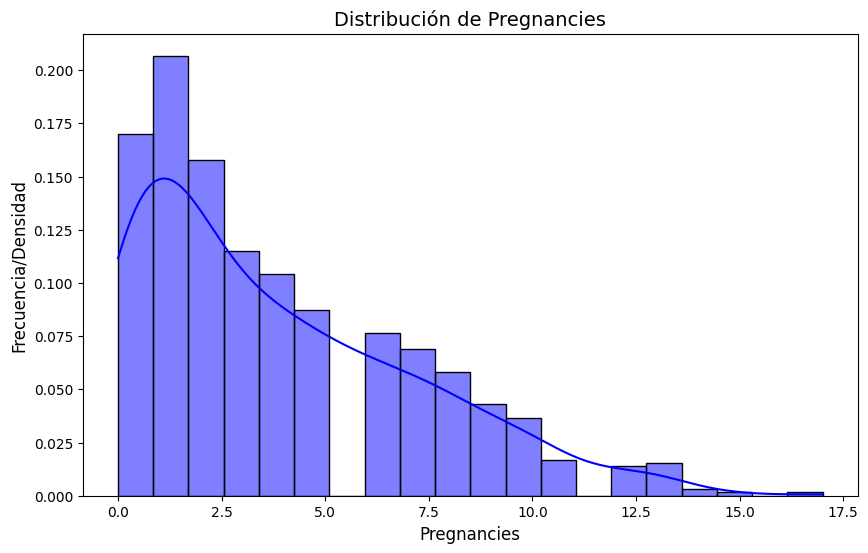

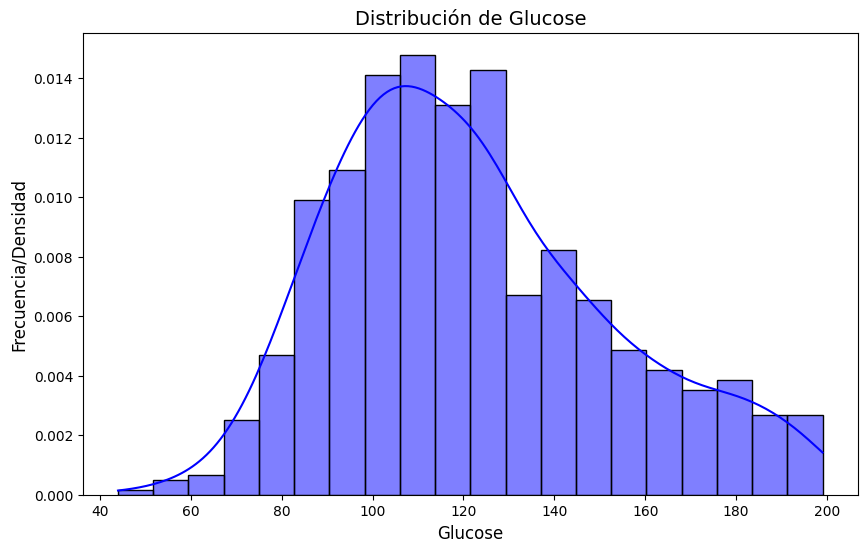

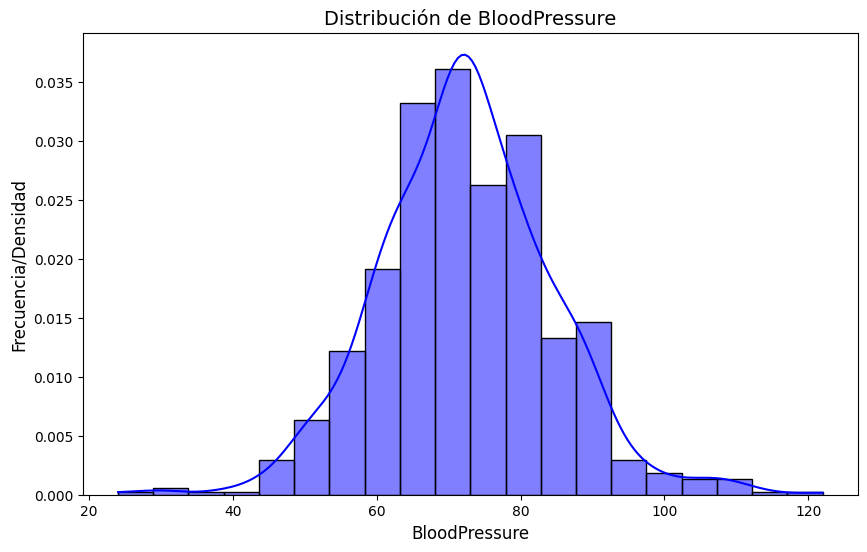

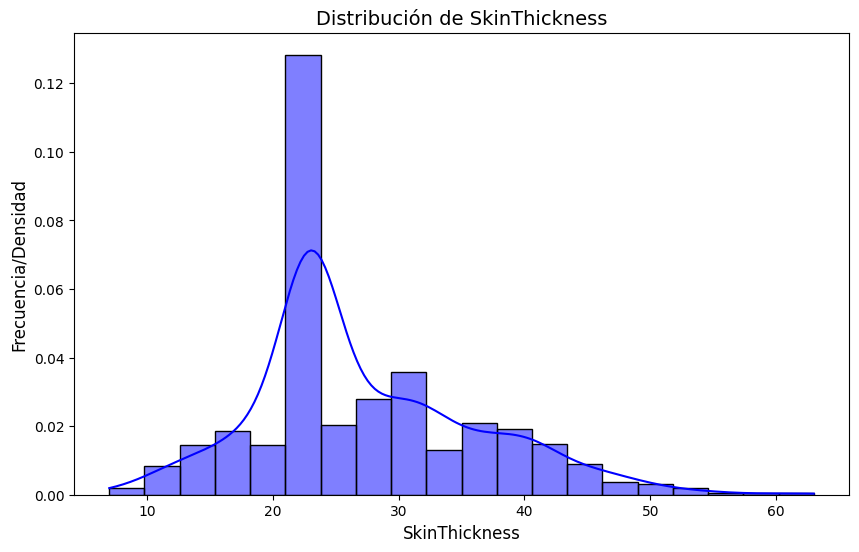

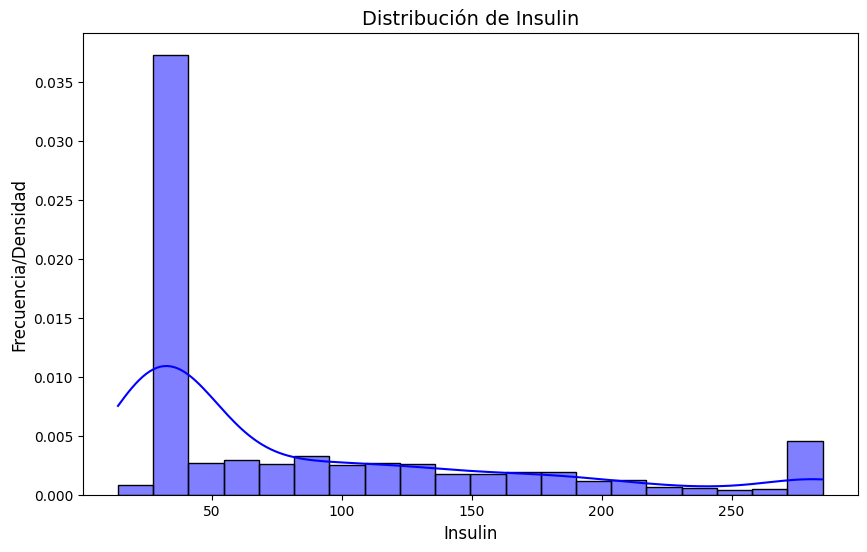

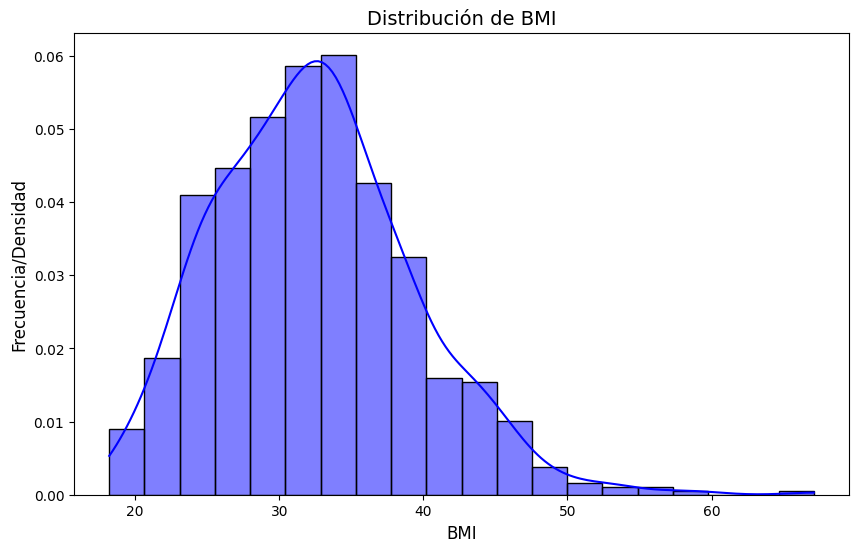

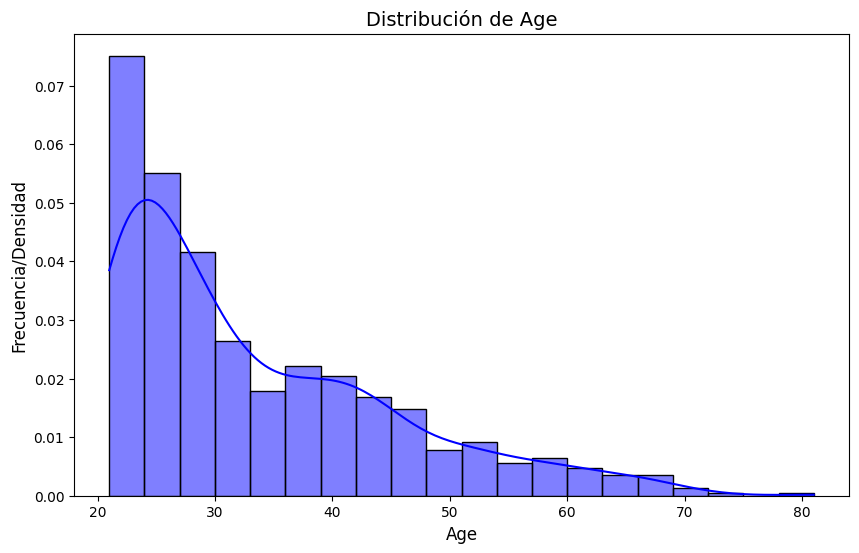

In [65]:
# Lista de columnas numéricas para analizar
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
figsize = (10, 6)

# Crea histogramas para cada columna numérica
for col in numeric_columns:
    plt.figure(figsize=figsize)
    sns.histplot(data=df, x=col, bins=20, kde=True, color='blue', stat="density")
    plt.title(f'Distribución de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frecuencia/Densidad', fontsize=12)
    plt.show()

Visualizamos cómo los valores se distribuyen y destaca posibles sesgos en el dataset.

C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_11280\2738869602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=col, palette='coolwarm')


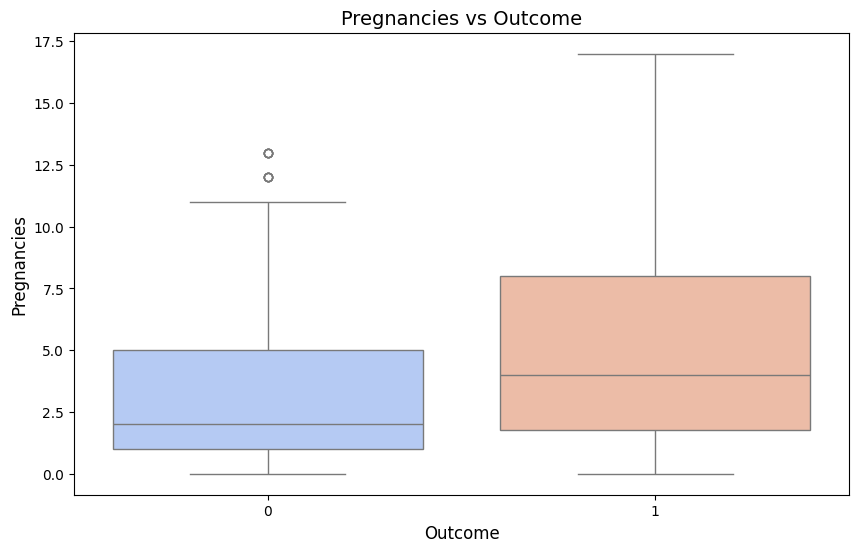

C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_11280\2738869602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=col, palette='coolwarm')


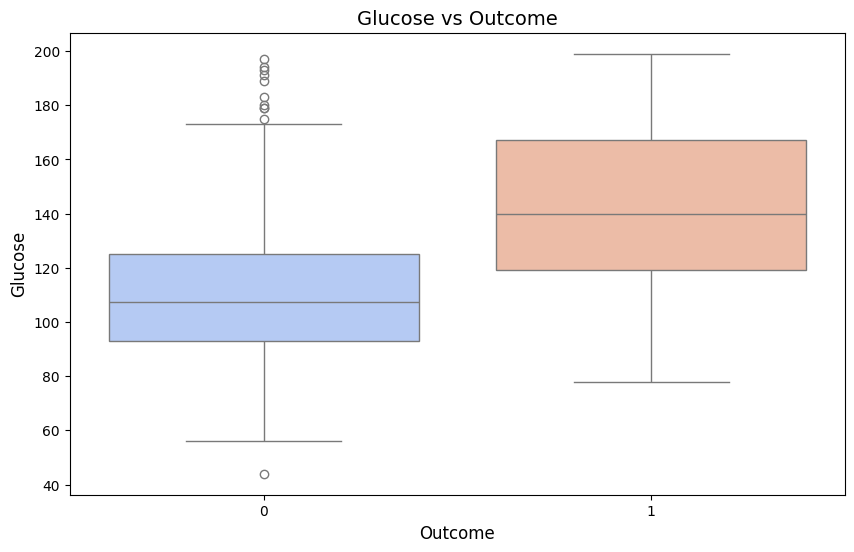

C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_11280\2738869602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=col, palette='coolwarm')


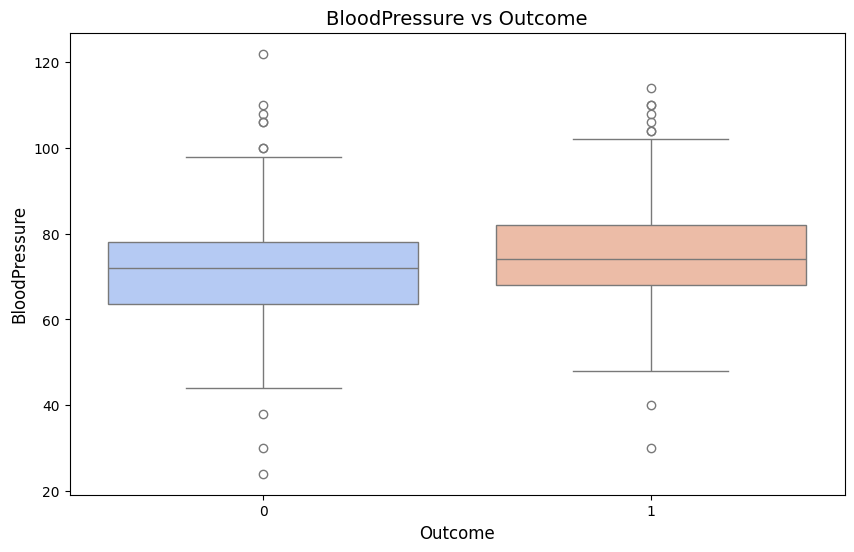

C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_11280\2738869602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=col, palette='coolwarm')


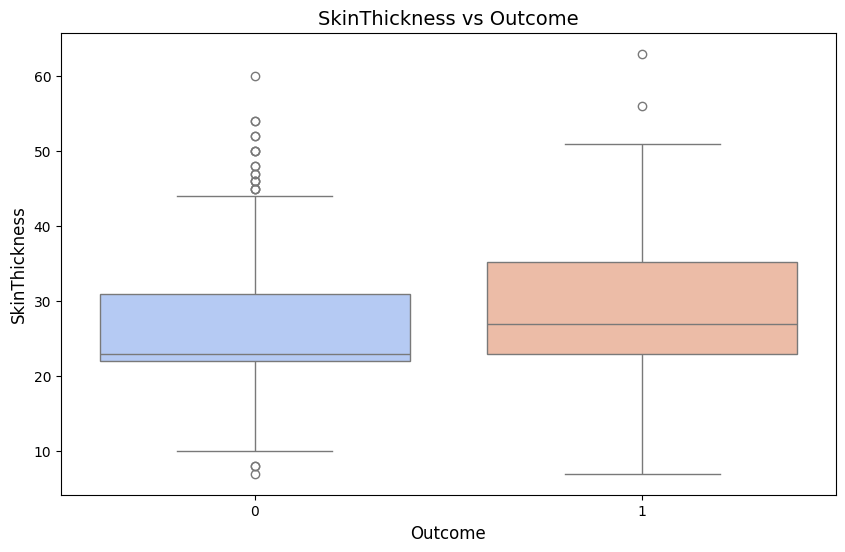

C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_11280\2738869602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=col, palette='coolwarm')


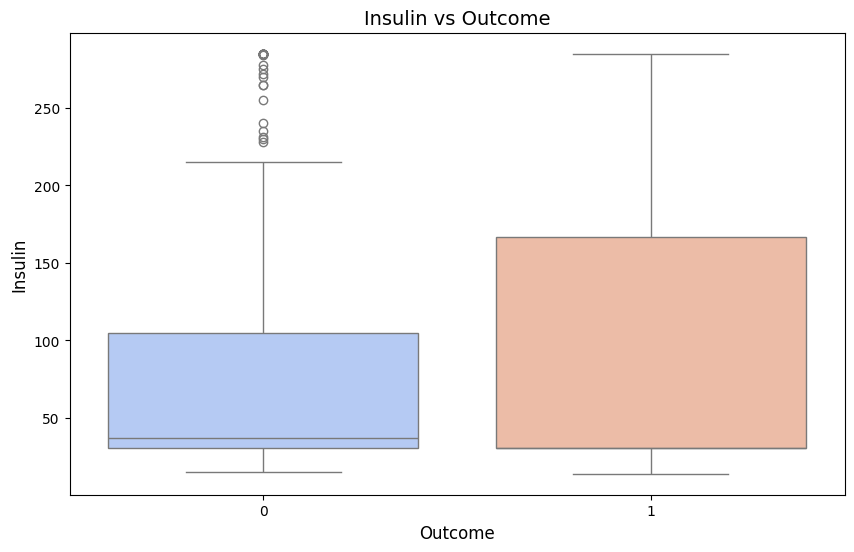

C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_11280\2738869602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=col, palette='coolwarm')


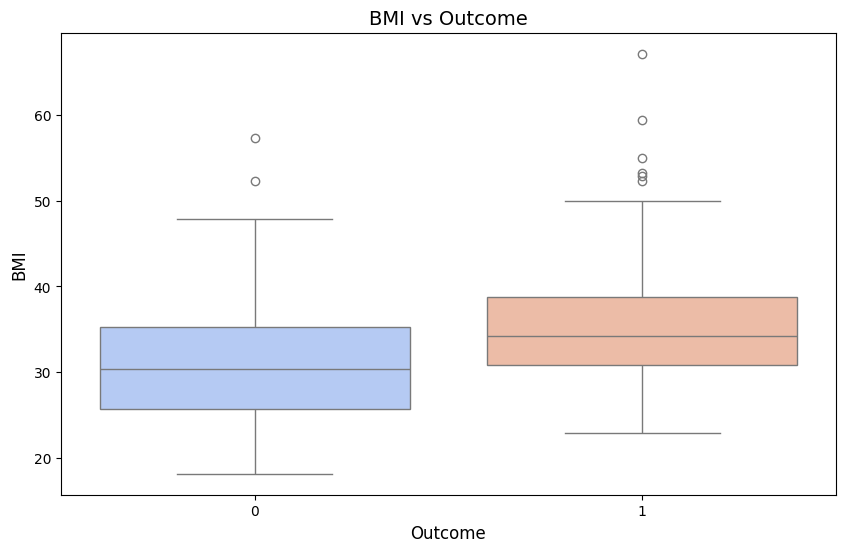

C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_11280\2738869602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=col, palette='coolwarm')


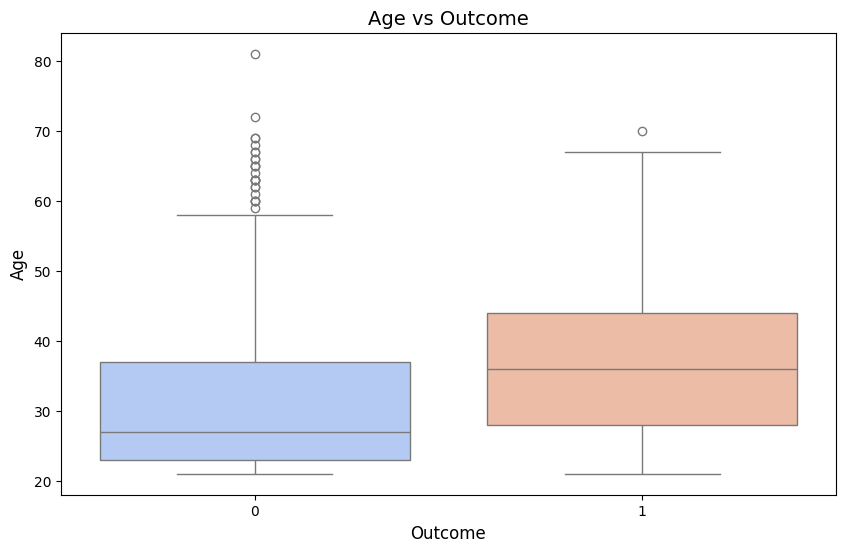

In [56]:
# Relación entre variables continuas y Outcome
for col in numeric_columns:
    plt.figure(figsize=figsize)
    sns.boxplot(data=df, x='Outcome', y=col, palette='coolwarm')
    plt.title(f'{col} vs Outcome', fontsize=14)
    plt.xlabel('Outcome', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()


Diferencias entre clases: Estas gráficas (boxplots) muestran cómo las características (como glucosa o insulina) varían según la presencia o ausencia de diabetes.

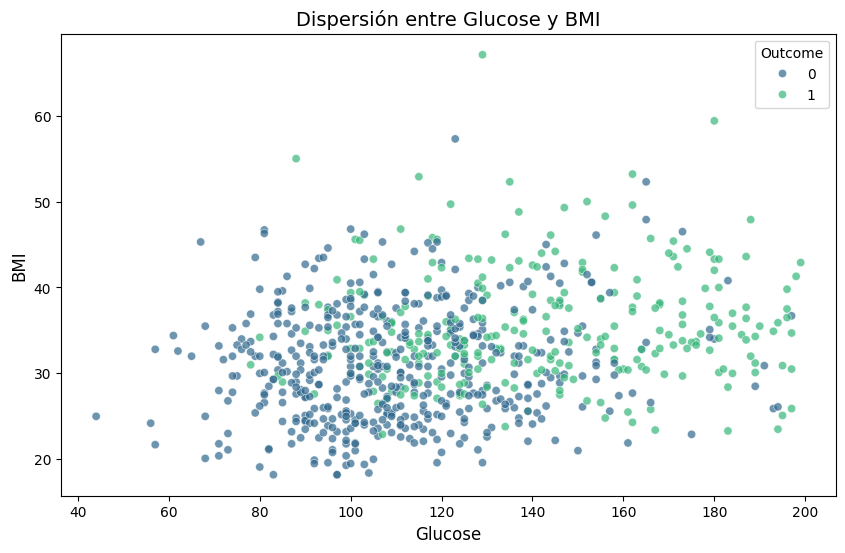

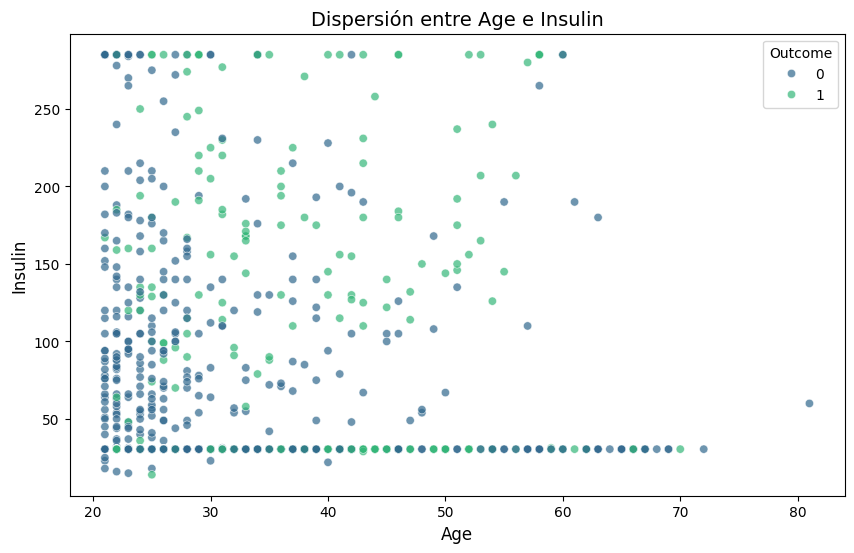

In [68]:
# Diagrama de dispersión entre algunas de las variables numéricas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', palette='viridis', alpha=0.7)
plt.title('Dispersión entre Glucose y BMI', fontsize=14)
plt.xlabel('Glucose', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Insulin', hue='Outcome', palette='viridis', alpha=0.7)
plt.title('Dispersión entre Age e Insulin', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Insulin', fontsize=12)
plt.show()

En los diagramas de dispersión, vemos si hay una relación lineal o alguna tendencia entre las variables seleccionadas

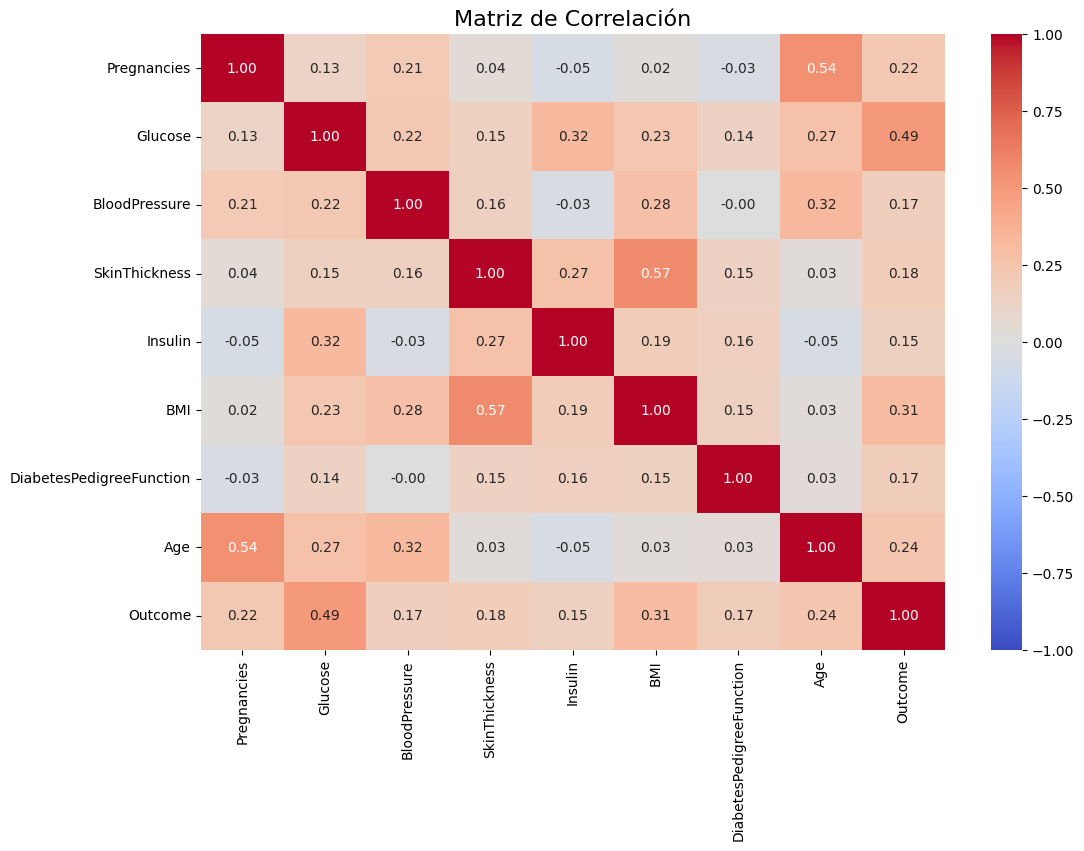

In [58]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()


Destaca características que están altamente correlacionadas con Outcome, asi como tambien identifica columnas con alta correlación que podrían ser redundantes.

In [59]:
# Medidas de tendencia central y dispersión
stats = df[numeric_columns].describe().T
stats['median'] = df[numeric_columns].median()
stats['mode'] = df[numeric_columns].mode().iloc[0]
stats['range'] = stats['max'] - stats['min']

print("Estadísticas descriptivas:")
print(stats)


Estadísticas descriptivas:
               count        mean        std   min    25%      50%     75%  \
Pregnancies    768.0    3.845052   3.369578   0.0   1.00    3.000    6.00   
Glucose        768.0  121.656250  30.438286  44.0  99.75  117.000  140.25   
BloodPressure  768.0   72.386719  12.096642  24.0  64.00   72.000   80.00   
SkinThickness  768.0   27.235677   8.859643   7.0  23.00   23.000   32.00   
Insulin        768.0   85.899414  77.240565  14.0  30.50   30.875  126.00   
BMI            768.0   32.450911   6.875366  18.2  27.50   32.000   36.60   
Age            768.0   33.240885  11.760232  21.0  24.00   29.000   41.00   

                 max   median  mode  range  
Pregnancies     17.0    3.000   1.0   17.0  
Glucose        199.0  117.000  99.0  155.0  
BloodPressure  122.0   72.000  72.0   98.0  
SkinThickness   63.0   23.000  23.0   56.0  
Insulin        285.0   30.875  30.5  271.0  
BMI             67.1   32.000  32.0   48.9  
Age             81.0   29.000  22.0   60.

### Implementacion de modelos:

He decidido usar adaboost de modo que pueda compararlo con los otros

In [70]:
# Separar características (X) y la variable objetivo (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# AdaBoost
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Predicciones
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
ada_pred = ada_model.predict(X_test)

# Evaluación de Modelos
models = ['Random Forest', 'XGBoost', 'AdaBoost']
predictions = [rf_pred, xgb_pred, ada_pred]
results = {}

for model, pred in zip(models, predictions):
    results[model] = {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1-Score': f1_score(y_test, pred),
        'ROC-AUC': roc_auc_score(y_test, pred)
    }

# Mostrar resultados
results_df = pd.DataFrame(results).T
print(results_df)


c:\Users\Belen Lugo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


               Accuracy  Precision    Recall  F1-Score   ROC-AUC
Random Forest  0.753247   0.644068  0.690909  0.666667  0.739394
XGBoost        0.753247   0.634921  0.727273  0.677966  0.747475
AdaBoost       0.759740   0.660714  0.672727  0.666667  0.740404


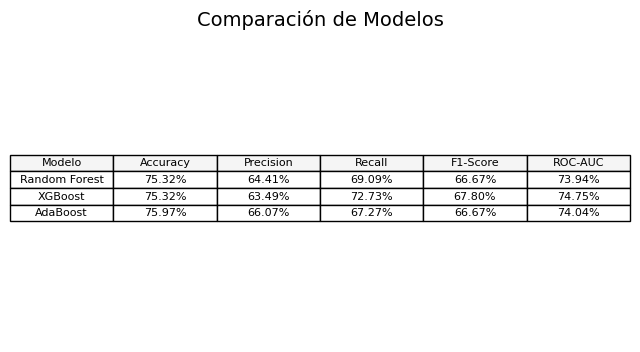

In [64]:
# Creamos un dataframe con los resultados para mejor visualizacion y entendimiento

data = {
    'Modelo': ['Random Forest', 'XGBoost', 'AdaBoost'],
    'Accuracy': ['75.32%', '75.32%', '75.97%'],
    'Precision': ['64.41%', '63.49%', '66.07%'],
    'Recall': ['69.09%', '72.73%', '67.27%'],
    'F1-Score': ['66.67%', '67.80%', '66.67%'],
    'ROC-AUC': ['73.94%', '74.75%', '74.04%']
}

df_comparison = pd.DataFrame(data)
plt.figure(figsize=(8, 4))
plt.table(cellText=df_comparison.values, colLabels=df_comparison.columns, loc='center', cellLoc='center', colColours=['#f5f5f5']*6)
plt.axis('off')

plt.title("Comparación de Modelos", fontsize=14)
plt.show()

Análisis:

XGBoost es el modelo con el mejor recall y F1-Score, lo que lo hace ideal si tu objetivo es maximizar la detección de casos positivos (personas que realmente tienen diabetes).

AdaBoost tiene la mayor precisión, lo que lo hace útil si buscas minimizar los falsos positivos.

Random Forest es una opción confiable, pero no destaca significativamente en comparación con los otros modelos.